<a href="https://colab.research.google.com/github/Yujin726/0624/blob/main/07_16_colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 코드 실행 예시

✅ 라이브러리 로드 완료!
🔥 PyTorch 버전: 2.6.0+cu124
💻 CUDA 사용 가능: False
🎯 ImageNet 1000개 클래스 분류기 실행 옵션:
1. 단일 이미지 분류: classify_uploaded_image()
2. 다중 모델 비교: compare_multiple_models()
3. 여러 이미지 일괄 분류: batch_classify()

💡 추천: classify_uploaded_image() 로 시작하세요!

🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등
📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리

⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!
🚀 ImageNet 1000개 클래스 분류기 시작!
📁 이미지를 업로드해주세요...
🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!


Saving 아이들 사진.jpg to 아이들 사진.jpg
📷 업로드된 파일: 아이들 사진.jpg
🧠 resnet50 모델 로딩 중...
💻 사용 디바이스: cpu


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

📋 ImageNet 라벨 로드 완료: 1000개
✅ resnet50 모델 준비 완료!
📊 분류 가능한 클래스: 1000개
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 5):
1. parallel bars                  6.24%
2. overskirt                      5.95%
3. candle                         5.06%
4. gown                           3.97%
5. maraca                         3.50%


/tmp/ipython-input-1-2406466660.py:210: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


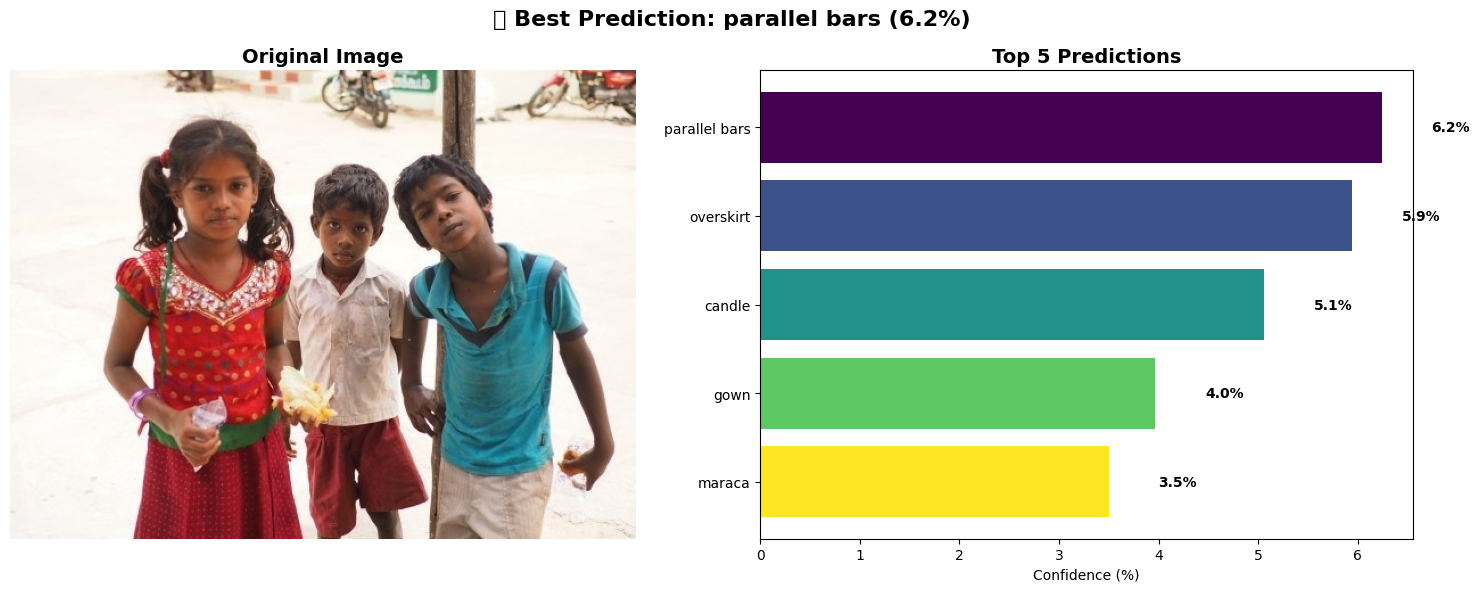


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cpu
   📋 총 클래스 수: 1000

✅ ImageNet 분류 완료!


{'original_image': <PIL.Image.Image image mode=RGB size=550x412>,
 'predictions': [{'rank': 1,
   'class_index': 702,
   'class_name': 'parallel bars',
   'probability': 0.06239672750234604,
   'percentage': 6.239672750234604},
  {'rank': 2,
   'class_index': 689,
   'class_name': 'overskirt',
   'probability': 0.05945134535431862,
   'percentage': 5.945134535431862},
  {'rank': 3,
   'class_index': 470,
   'class_name': 'candle',
   'probability': 0.05062200501561165,
   'percentage': 5.062200501561165},
  {'rank': 4,
   'class_index': 578,
   'class_name': 'gown',
   'probability': 0.03965320810675621,
   'percentage': 3.965320810675621},
  {'rank': 5,
   'class_index': 641,
   'class_name': 'maraca',
   'probability': 0.03497714921832085,
   'percentage': 3.4977149218320847},
  {'rank': 6,
   'class_index': 862,
   'class_name': 'torch',
   'probability': 0.0340670645236969,
   'percentage': 3.40670645236969},
  {'rank': 7,
   'class_index': 601,
   'class_name': 'hoopskirt',
   'pr

In [1]:
# 📦 Google Colab용 ImageNet 1000개 클래스 분류기
# 🧠 사전 훈련된 딥러닝 모델로 즉시 객체 인식!

# 필요한 라이브러리 설치 및 임포트
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from io import BytesIO
import cv2

print("✅ 라이브러리 로드 완료!")
print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"💻 CUDA 사용 가능: {torch.cuda.is_available()}")

# =============================================================================
# ImageNet 1000개 클래스 분류기
# =============================================================================

class ImageNetClassifier:
    """ImageNet 사전 훈련된 모델을 사용한 1000개 클래스 분류기"""

    def __init__(self, model_name='resnet50'):
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드
        self.model = self.load_model(model_name)
        self.model.eval()  # 평가 모드

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels()

        # 이미지 전처리 설정
        self.transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")

    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        models_dict = {
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        if model_name not in models_dict:
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        model = models_dict[model_name]
        return model.to(self.device)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드"""
        try:
            # ImageNet 클래스 라벨 다운로드
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
            response = requests.get(url)
            labels = response.text.strip().split('\n')
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels
        except:
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            # 일부 주요 클래스만 포함한 기본 라벨
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    # URL에서 이미지 다운로드
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB')
                else:
                    # 로컬 파일
                    image = Image.open(image_source).convert('RGB')
            else:
                # PIL Image 객체
                image = image_source.convert('RGB')

            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패: {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리"""
        if image is None:
            return None

        # PIL Image → Tensor
        tensor = self.transform(image).unsqueeze(0)  # 배치 차원 추가
        return tensor.to(self.device)

    def predict(self, image_source, top_k=5):
        """이미지 분류 예측"""
        print(f"🔍 이미지 분석 중...")

        # 이미지 로드
        image = self.load_image(image_source)
        if image is None:
            return None

        original_image = image.copy()

        # 전처리
        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        # 예측
        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

        # Top-K 결과 추출
        top_prob, top_indices = torch.topk(probabilities, top_k)

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return {
            'original_image': original_image,
            'predictions': results,
            'model_info': {
                'model_name': self.model.__class__.__name__,
                'device': str(self.device),
                'total_classes': len(self.class_labels)
            }
        }

    def visualize_results(self, results, show_top_k=5):
        """결과 시각화"""
        if results is None:
            print("❌ 결과가 없습니다.")
            return

        # 결과 출력
        print(f"\n🎯 ImageNet 분류 결과 (Top {show_top_k}):")
        print("=" * 60)

        predictions = results['predictions'][:show_top_k]

        for pred in predictions:
            print(f"{pred['rank']}. {pred['class_name']:<30} {pred['percentage']:.2f}%")

        print("=" * 60)

        # 시각화
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # 원본 이미지
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # 예측 결과 막대 그래프
        class_names = [pred['class_name'][:20] for pred in predictions]  # 이름 길이 제한
        probabilities = [pred['percentage'] for pred in predictions]
        colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))

        bars = ax2.barh(range(len(predictions)), probabilities, color=colors)
        ax2.set_yticks(range(len(predictions)))
        ax2.set_yticklabels(class_names)
        ax2.set_xlabel('Confidence (%)')
        ax2.set_title(f'Top {show_top_k} Predictions', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()  # 높은 확률이 위로

        # 막대에 퍼센트 표시
        for i, (bar, prob) in enumerate(zip(bars, probabilities)):
            ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{prob:.1f}%', va='center', fontweight='bold')

        # 전체 제목
        best_prediction = predictions[0]
        plt.suptitle(f'🏆 Best Prediction: {best_prediction["class_name"]} ({best_prediction["percentage"]:.1f}%)',
                    fontsize=16, fontweight='bold')

        plt.tight_layout()
        plt.show()

        # 모델 정보
        model_info = results['model_info']
        print(f"\n📊 모델 정보:")
        print(f"   🧠 모델: {model_info['model_name']}")
        print(f"   💻 디바이스: {model_info['device']}")
        print(f"   📋 총 클래스 수: {model_info['total_classes']}")

    def compare_models(self, image_source, model_names=['resnet50', 'vgg16', 'efficientnet_b0']):
        """여러 모델 성능 비교"""
        print(f"🔄 다중 모델 비교 시작...")

        original_model = self.model
        original_name = original_model.__class__.__name__

        results_comparison = []

        for model_name in model_names:
            print(f"\n🧠 {model_name} 모델로 예측 중...")

            # 모델 변경
            self.model = self.load_model(model_name)
            self.model.eval()

            # 예측
            result = self.predict(image_source, top_k=3)
            if result:
                best_pred = result['predictions'][0]
                results_comparison.append({
                    'model_name': model_name,
                    'best_class': best_pred['class_name'],
                    'confidence': best_pred['percentage'],
                    'top3': result['predictions']
                })

        # 원래 모델 복원
        self.model = original_model

        # 비교 결과 시각화
        if results_comparison:
            self.visualize_model_comparison(results_comparison, image_source)

        return results_comparison

    def visualize_model_comparison(self, results_comparison, image_source):
        """모델 비교 결과 시각화"""
        # 이미지 로드
        image = self.load_image(image_source)

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 원본 이미지
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')

        # 각 모델별 Top 1 결과
        model_names = [result['model_name'] for result in results_comparison]
        confidences = [result['confidence'] for result in results_comparison]
        predictions = [result['best_class'][:15] for result in results_comparison]  # 이름 단축

        colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(model_names)]

        bars = axes[0, 1].bar(model_names, confidences, color=colors, alpha=0.7)
        axes[0, 1].set_title('Model Confidence Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Confidence (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 막대에 예측 클래스와 확률 표시
        for bar, pred, conf in zip(bars, predictions, confidences):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                           f'{pred}\n{conf:.1f}%', ha='center', va='bottom', fontsize=10)

        # 상세 비교 테이블
        axes[1, 0].axis('off')
        table_data = []
        for result in results_comparison:
            row = [result['model_name'], result['best_class'][:20], f"{result['confidence']:.1f}%"]
            table_data.append(row)

        table = axes[1, 0].table(cellText=table_data,
                                colLabels=['Model', 'Best Prediction', 'Confidence'],
                                cellLoc='center',
                                loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 0].set_title('Detailed Comparison', fontsize=14, fontweight='bold')

        # 모델별 Top 3 비교
        axes[1, 1].axis('off')
        y_pos = 0.9
        for result in results_comparison:
            axes[1, 1].text(0.05, y_pos, f"🧠 {result['model_name']}:", fontweight='bold', fontsize=12)
            y_pos -= 0.08
            for i, pred in enumerate(result['top3']):
                axes[1, 1].text(0.1, y_pos, f"{i+1}. {pred['class_name'][:25]} ({pred['percentage']:.1f}%)",
                               fontsize=10)
                y_pos -= 0.06
            y_pos -= 0.02

        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('Top 3 Predictions per Model', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

# =============================================================================
# 실행 함수들
# =============================================================================

def classify_uploaded_image():
    """파일 업로드 후 ImageNet 분류"""
    print("🚀 ImageNet 1000개 클래스 분류기 시작!")
    print("=" * 60)

    # 파일 업로드
    print("📁 이미지를 업로드해주세요...")
    print("🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!")

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier(model_name='resnet50')

        # 예측
        results = classifier.predict(filename, top_k=10)

        # 결과 시각화
        classifier.visualize_results(results, show_top_k=5)

        print("\n✅ ImageNet 분류 완료!")
        return results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def compare_multiple_models():
    """여러 모델로 동일 이미지 비교"""
    print("🔄 다중 모델 성능 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier()

        # 여러 모델 비교
        models_to_compare = ['resnet50', 'vgg16', 'efficientnet_b0', 'mobilenet_v2']
        comparison_results = classifier.compare_models(filename, models_to_compare)

        print("\n✅ 다중 모델 비교 완료!")
        return comparison_results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def batch_classify():
    """여러 이미지 일괄 업로드 분류"""
    print("📁 여러 이미지 일괄 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    try:
        classifier = ImageNetClassifier()
        results_list = []

        for filename in uploaded.keys():
            print(f"\n🔍 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)

            if results:
                # 간단한 결과 출력
                best_pred = results['predictions'][0]
                print(f"🏆 {filename}: {best_pred['class_name']} ({best_pred['percentage']:.1f}%)")
                results_list.append((filename, best_pred['class_name'], best_pred['percentage']))

        # 전체 결과 요약
        print(f"\n{'='*60}")
        print("📋 일괄 분류 결과 요약")
        print(f"{'='*60}")
        for filename, pred_class, confidence in results_list:
            print(f"📷 {filename:25} → {pred_class:20} ({confidence:.1f}%)")

        return results_list

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 ImageNet 1000개 클래스 분류기 실행 옵션:")
print("1. 단일 이미지 분류: classify_uploaded_image()")
print("2. 다중 모델 비교: compare_multiple_models()")
print("3. 여러 이미지 일괄 분류: batch_classify()")
print("\n💡 추천: classify_uploaded_image() 로 시작하세요!")
print("\n🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("\n⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!")

# 사용자가 직접 함수 호출
classify_uploaded_image()

#함수 분류 및 주석 처리(코드 그대로)

✅ [1부] 라이브러리 및 클래스 정의 ~ __init__() 까지 (세부 주석 포함)

In [ ]:
# 📦 Google Colab용 ImageNet 1000개 클래스 분류기
# 🧠 사전 훈련된 딥러닝 모델로 즉시 객체 인식!

# 필요한 라이브러리 설치 및 임포트
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from io import BytesIO
import cv2

print("✅ 라이브러리 로드 완료!")
print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"💻 CUDA 사용 가능: {torch.cuda.is_available()}")

# =============================================================================
# ImageNet 1000개 클래스 분류기
# =============================================================================

class ImageNetClassifier:
    """ImageNet 사전 훈련된 모델을 사용한 1000개 클래스 분류기"""

    def __init__(self, model_name='resnet50'):
        # 생성자: 모델과 라벨, 전처리기를 초기화
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드 및 평가 모드 설정
        self.model = self.load_model(model_name)
        self.model.eval()  # 평가 모드

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels()

        # 이미지 전처리 파이프라인 정의
        self.transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")


 ✅ [2부] load_model, load_imagenet_labels, load_image, preprocess_image

In [ ]:
    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        # 지원하는 모델들을 딕셔너리로 정의
        models_dict = {
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        # 만약 지정한 모델이 없으면 기본으로 resnet50 사용
        if model_name not in models_dict:
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        # 모델을 device(GPU or CPU)로 이동시킴
        model = models_dict[model_name]
        return model.to(self.device)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드"""
        try:
            # ImageNet 클래스 라벨 다운로드 (텍스트 파일)
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
            response = requests.get(url)
            labels = response.text.strip().split('\n')
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels
        except:
            # 실패할 경우 기본 라벨 (class_0 ~ class_999)을 사용
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    # URL에서 이미지 다운로드
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB')
                else:
                    # 로컬 파일 경로에서 이미지 로드
                    image = Image.open(image_source).convert('RGB')
            else:
                # 이미 PIL Image 객체인 경우
                image = image_source.convert('RGB')

            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패: {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리"""
        if image is None:
            return None

        # PIL Image → Tensor로 변환 + 배치 차원 추가
        tensor = self.transform(image).unsqueeze(0)  # 배치 차원 추가
        return tensor.to(self.device)


 ✅ [3부] 예측, 시각화, 모델 비교 함수들

In [ ]:
    def predict(self, image_source, top_k=5):
        """이미지 분류 예측"""
        print(f"🔍 이미지 분석 중...")

        # 이미지 로드
        image = self.load_image(image_source)
        if image is None:
            return None

        # 시각화를 위해 원본 이미지 복사
        original_image = image.copy()

        # 전처리 수행
        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        # 예측 수행 (그래디언트 계산 비활성화)
        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

        # Top-K 결과 추출
        top_prob, top_indices = torch.topk(probabilities, top_k)

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return {
            'original_image': original_image,
            'predictions': results,
            'model_info': {
                'model_name': self.model.__class__.__name__,
                'device': str(self.device),
                'total_classes': len(self.class_labels)
            }
        }

    def visualize_results(self, results, show_top_k=5):
        """결과 시각화"""
        if results is None:
            print("❌ 결과가 없습니다.")
            return

        # 결과 출력
        print(f"\n🎯 ImageNet 분류 결과 (Top {show_top_k}):")
        print("=" * 60)

        predictions = results['predictions'][:show_top_k]

        for pred in predictions:
            print(f"{pred['rank']}. {pred['class_name']:<30} {pred['percentage']:.2f}%")

        print("=" * 60)

        # 시각화 설정
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # 원본 이미지 시각화
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # 예측 결과 막대 그래프
        class_names = [pred['class_name'][:20] for pred in predictions]  # 이름 길이 제한
        probabilities = [pred['percentage'] for pred in predictions]
        colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))

        bars = ax2.barh(range(len(predictions)), probabilities, color=colors)
        ax2.set_yticks(range(len(predictions)))
        ax2.set_yticklabels(class_names)
        ax2.set_xlabel('Confidence (%)')
        ax2.set_title(f'Top {show_top_k} Predictions', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()  # 높은 확률이 위로

        # 막대에 확률 수치 표시
        for i, (bar, prob) in enumerate(zip(bars, probabilities)):
            ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{prob:.1f}%', va='center', fontweight='bold')

        # 전체 타이틀
        best_prediction = predictions[0]
        plt.suptitle(f'🏆 Best Prediction: {best_prediction["class_name"]} ({best_prediction["percentage"]:.1f}%)',
                    fontsize=16, fontweight='bold')

        plt.tight_layout()
        plt.show()

        # 모델 정보 출력
        model_info = results['model_info']
        print(f"\n📊 모델 정보:")
        print(f"   🧠 모델: {model_info['model_name']}")
        print(f"   💻 디바이스: {model_info['device']}")
        print(f"   📋 총 클래스 수: {model_info['total_classes']}")

    def compare_models(self, image_source, model_names=['resnet50', 'vgg16', 'efficientnet_b0']):
        """여러 모델 성능 비교"""
        print(f"🔄 다중 모델 비교 시작...")

        # 현재 모델 상태 저장
        original_model = self.model
        original_name = original_model.__class__.__name__

        results_comparison = []

        for model_name in model_names:
            print(f"\n🧠 {model_name} 모델로 예측 중...")

            # 모델을 새로 로드
            self.model = self.load_model(model_name)
            self.model.eval()

            # 예측 실행
            result = self.predict(image_source, top_k=3)
            if result:
                best_pred = result['predictions'][0]
                results_comparison.append({
                    'model_name': model_name,
                    'best_class': best_pred['class_name'],
                    'confidence': best_pred['percentage'],
                    'top3': result['predictions']
                })

        # 원래 모델 복원
        self.model = original_model

        # 비교 결과 시각화
        if results_comparison:
            self.visualize_model_comparison(results_comparison, image_source)

        return results_comparison

    def visualize_model_comparison(self, results_comparison, image_source):
        """모델 비교 결과 시각화"""
        # 원본 이미지 로드
        image = self.load_image(image_source)

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. 이미지 시각화
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')

        # 2. Top-1 Confidence 막대그래프
        model_names = [result['model_name'] for result in results_comparison]
        confidences = [result['confidence'] for result in results_comparison]
        predictions = [result['best_class'][:15] for result in results_comparison]  # 이름 단축

        colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(model_names)]

        bars = axes[0, 1].bar(model_names, confidences, color=colors, alpha=0.7)
        axes[0, 1].set_title('Model Confidence Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Confidence (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 막대 위에 클래스 이름과 퍼센트 표시
        for bar, pred, conf in zip(bars, predictions, confidences):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                           f'{pred}\n{conf:.1f}%', ha='center', va='bottom', fontsize=10)

        # 3. 상세 테이블 비교
        axes[1, 0].axis('off')
        table_data = []
        for result in results_comparison:
            row = [result['model_name'], result['best_class'][:20], f"{result['confidence']:.1f}%"]
            table_data.append(row)

        table = axes[1, 0].table(cellText=table_data,
                                colLabels=['Model', 'Best Prediction', 'Confidence'],
                                cellLoc='center',
                                loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 0].set_title('Detailed Comparison', fontsize=14, fontweight='bold')

        # 4. 각 모델의 Top-3 결과 나열
        axes[1, 1].axis('off')
        y_pos = 0.9
        for result in results_comparison:
            axes[1, 1].text(0.05, y_pos, f"🧠 {result['model_name']}:", fontweight='bold', fontsize=12)
            y_pos -= 0.08
            for i, pred in enumerate(result['top3']):
                axes[1, 1].text(0.1, y_pos, f"{i+1}. {pred['class_name'][:25]} ({pred['percentage']:.1f}%)",
                               fontsize=10)
                y_pos -= 0.06
            y_pos -= 0.02

        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('Top 3 Predictions per Model', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()


✅ [4부] 실행 함수 (파일 업로드 & 실행 파트)

In [ ]:
# =============================================================================
# 실행 함수들
# =============================================================================

def classify_uploaded_image():
    """파일 업로드 후 ImageNet 분류"""
    print("🚀 ImageNet 1000개 클래스 분류기 시작!")
    print("=" * 60)

   # 이미지 파일 업로드 요청
    print("📁 이미지를 업로드해주세요...")
    print("🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!")

    from google.colab import files
    uploaded = files.upload()

  # 업로드 실패 시 종료
    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None
  # 첫 번째 업로드 파일명 추출
    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # ImageNet 분류기 인스턴스 생성
        classifier = ImageNetClassifier(model_name='resnet50')

        # 이미지 예측
        results = classifier.predict(filename, top_k=10)

        # 예측 결과 시각화
        classifier.visualize_results(results, show_top_k=5)

        print("\n✅ ImageNet 분류 완료!")
        return results

    except Exception as e:
        # 예외 처리
        print(f"❌ 오류 발생: {e}")
        return None

def compare_multiple_models():
    """여러 모델로 동일 이미지 비교"""
    print("🔄 다중 모델 성능 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

   # 업로드 실패 시 종료
    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

   # 첫 번째 업로드 파일명 추출
    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 기본 모델로 분류기 생성
        classifier = ImageNetClassifier()

        # 비교할 모델 리스트 정의
        models_to_compare = ['resnet50', 'vgg16', 'efficientnet_b0', 'mobilenet_v2']

        # 모델 비교 실행
        comparison_results = classifier.compare_models(filename, models_to_compare)

        print("\n✅ 다중 모델 비교 완료!")
        return comparison_results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def batch_classify():
    """여러 이미지 일괄 업로드 분류"""
    print("📁 여러 이미지 일괄 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    # 업로드 실패 시 종료
    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    try:
        # 분류기 초기화
        classifier = ImageNetClassifier()
        results_list = []

        # 업로드된 각 이미지에 대해 예측 수행
        for filename in uploaded.keys():
            print(f"\n🔍 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)

            if results:
                # 최상위 예측 출력
                best_pred = results['predictions'][0]
                print(f"🏆 {filename}: {best_pred['class_name']} ({best_pred['percentage']:.1f}%)")
                results_list.append((filename, best_pred['class_name'], best_pred['percentage']))

        # 전체 결과 요약 출력
        print(f"\n{'='*60}")
        print("📋 일괄 분류 결과 요약")
        print(f"{'='*60}")
        for filename, pred_class, confidence in results_list:
            print(f"📷 {filename:25} → {pred_class:20} ({confidence:.1f}%)")

        return results_list

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None


✅ [5부]안내 메시지 출력 & 기본 실행 함수

In [ ]:
# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 ImageNet 1000개 클래스 분류기 실행 옵션:")
print("1. 단일 이미지 분류: classify_uploaded_image()")
print("2. 다중 모델 비교: compare_multiple_models()")
print("3. 여러 이미지 일괄 분류: batch_classify()")
print("\n💡 추천: classify_uploaded_image() 로 시작하세요!")
print("\n🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("\n⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!")

# 사용자가 직접 함수 호출
classify_uploaded_image()


# 🔄다중 이미지 업로드 가능하도록 수정 코드
->  변경된(또는 새로 추가된) 부분마다 # 🔄 [MOD] ... 주석



✅ 라이브러리 로드 완료!
🔥 PyTorch 버전: 2.6.0+cu124
💻 CUDA 사용 가능: True
🎯 ImageNet 1000개 클래스 분류기 실행 옵션:
1. 다중 이미지 분류(≤10장): classify_uploaded_image()
2. 다중 모델 비교: compare_multiple_models()
3. 여러 이미지 일괄 분류: batch_classify()

💡 추천: classify_uploaded_image() 로 여러 이미지 테스트해 보세요!

🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등
📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리

⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!
🚀 ImageNet 1000개 클래스 분류기 시작!
📁 이미지를 최대 10장까지 업로드해 주세요...
🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!


Saving 농구사진.jpg to 농구사진.jpg
Saving 신호등 건너는 사진.jpg to 신호등 건너는 사진.jpg
Saving 신호등 건너는 사진2.jpg to 신호등 건너는 사진2.jpg
Saving 신호등 건너는 사진3.jpg to 신호등 건너는 사진3.jpg
Saving 아이돌 사진.jpg to 아이돌 사진.jpg
Saving 아이돌 사진2(밝은버전).jpg to 아이돌 사진2(밝은버전).jpg
Saving 아이들 사진.jpg to 아이들 사진.jpg
Saving 자동차 안 사람 사진.jpg to 자동차 안 사람 사진.jpg
Saving 자전거 타는 사진.jpg to 자전거 타는 사진.jpg
Saving 학교 사진.jpg to 학교 사진.jpg
🧠 resnet50 모델 로딩 중...
💻 사용 디바이스: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

📋 ImageNet 라벨 로드 완료: 1000개
✅ resnet50 모델 준비 완료!
📊 분류 가능한 클래스: 1000개

[1/10] 📷 농구사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. basketball                     99.80%
2. horizontal bar                 0.06%
3. balance beam                   0.03%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


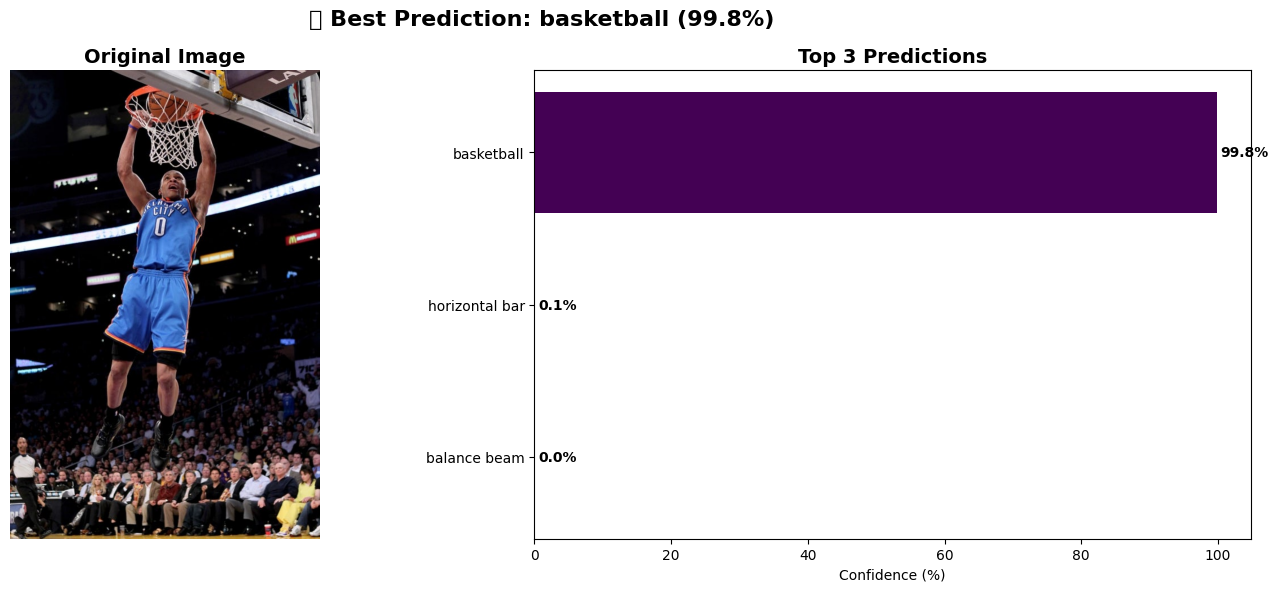


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[2/10] 📷 신호등 건너는 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. traffic light                  12.24%
2. unicycle                       7.73%
3. lakeside                       5.47%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


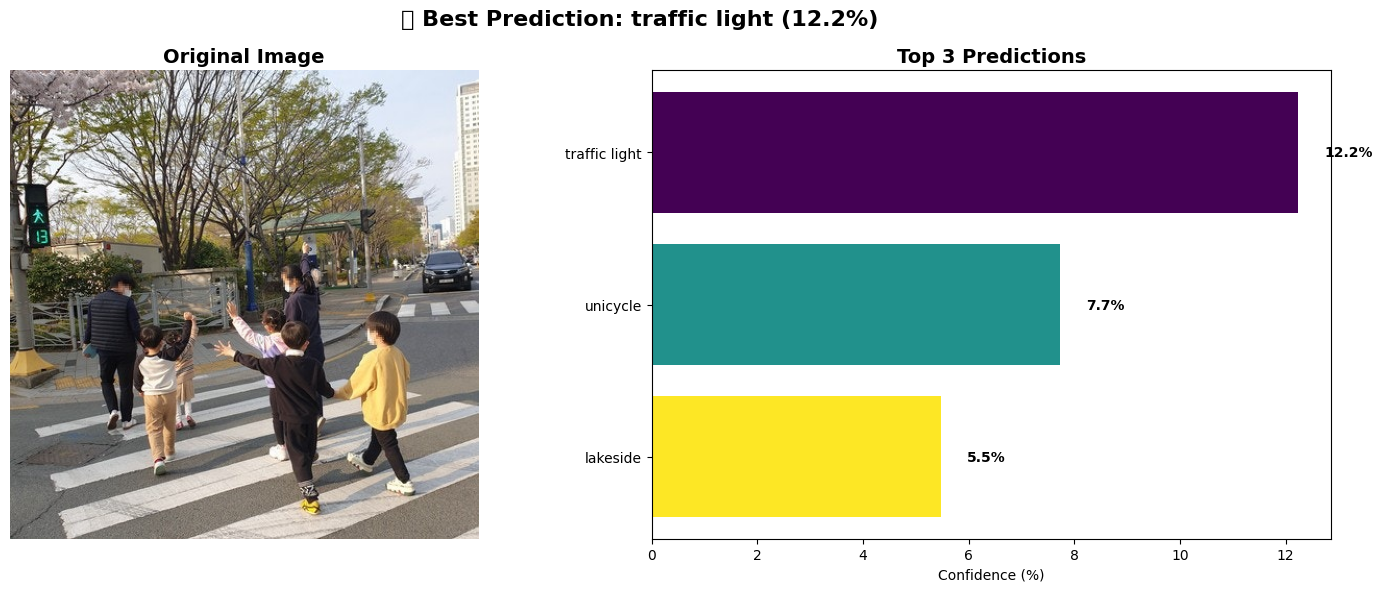


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[3/10] 📷 신호등 건너는 사진2.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. dumbbell                       35.89%
2. solar dish                     22.43%
3. barbell                        7.86%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


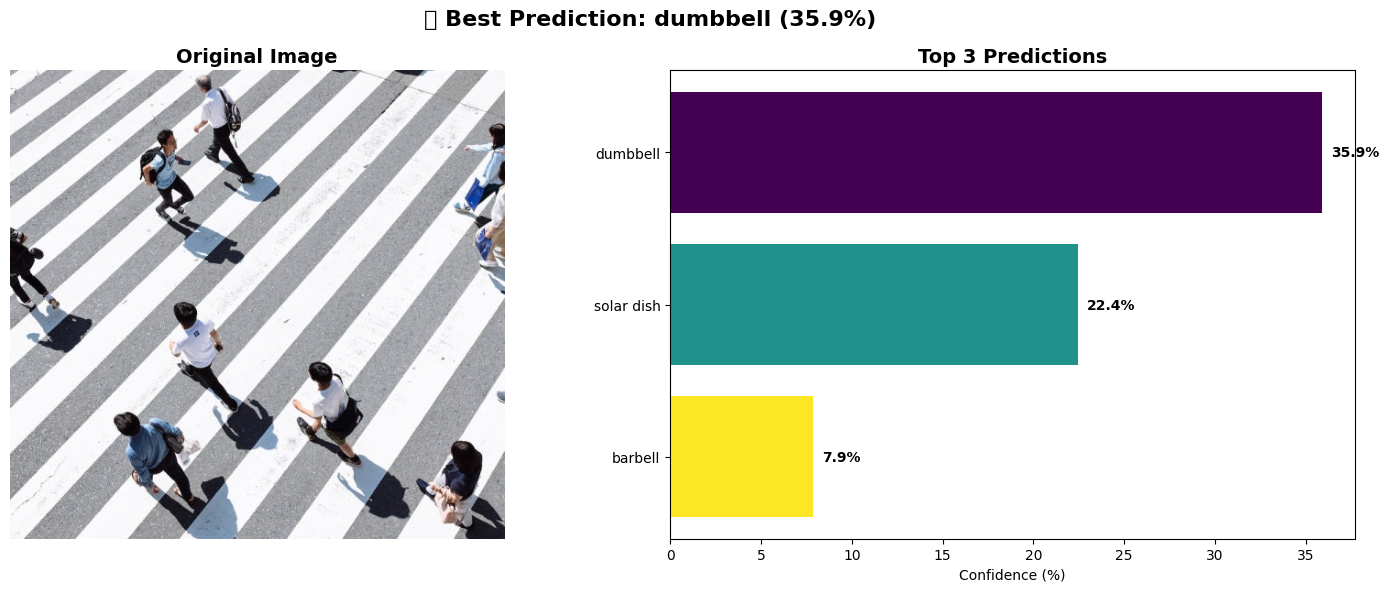


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[4/10] 📷 신호등 건너는 사진3.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. streetcar                      15.25%
2. traffic light                  10.44%
3. mosque                         10.23%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


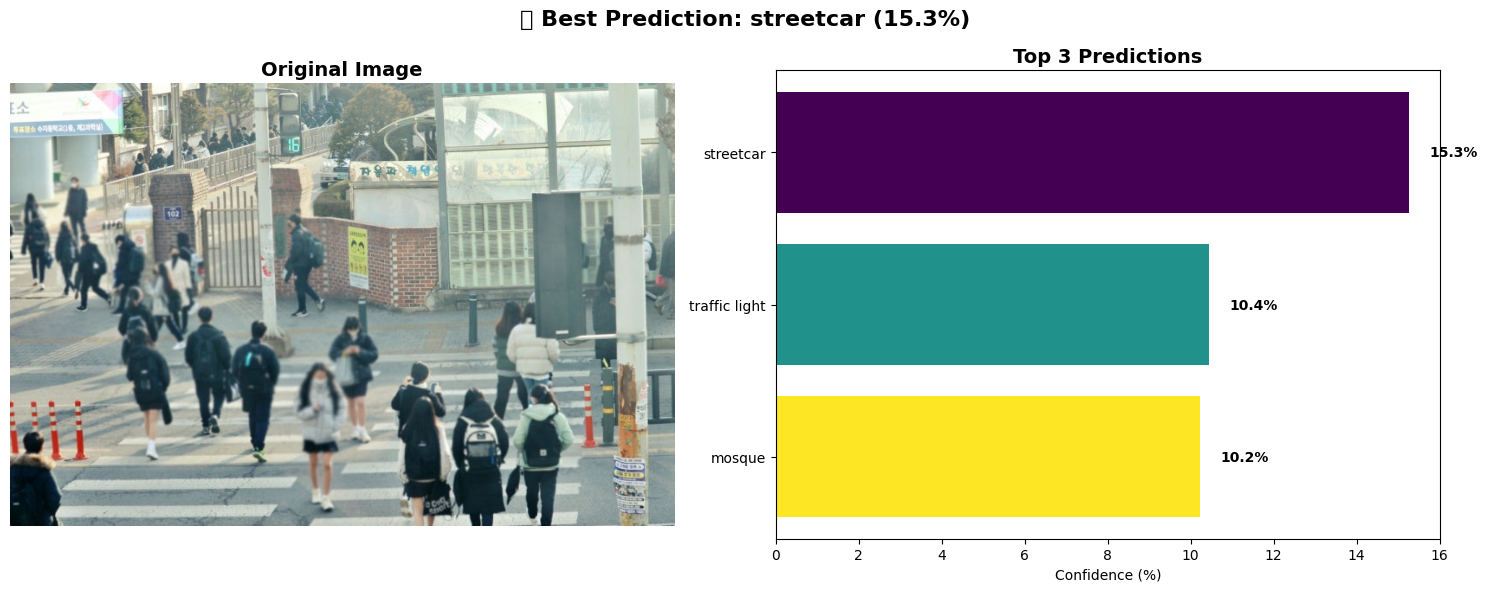


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[5/10] 📷 아이돌 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. miniskirt                      48.14%
2. maillot                        21.95%
3. maillot                        5.76%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


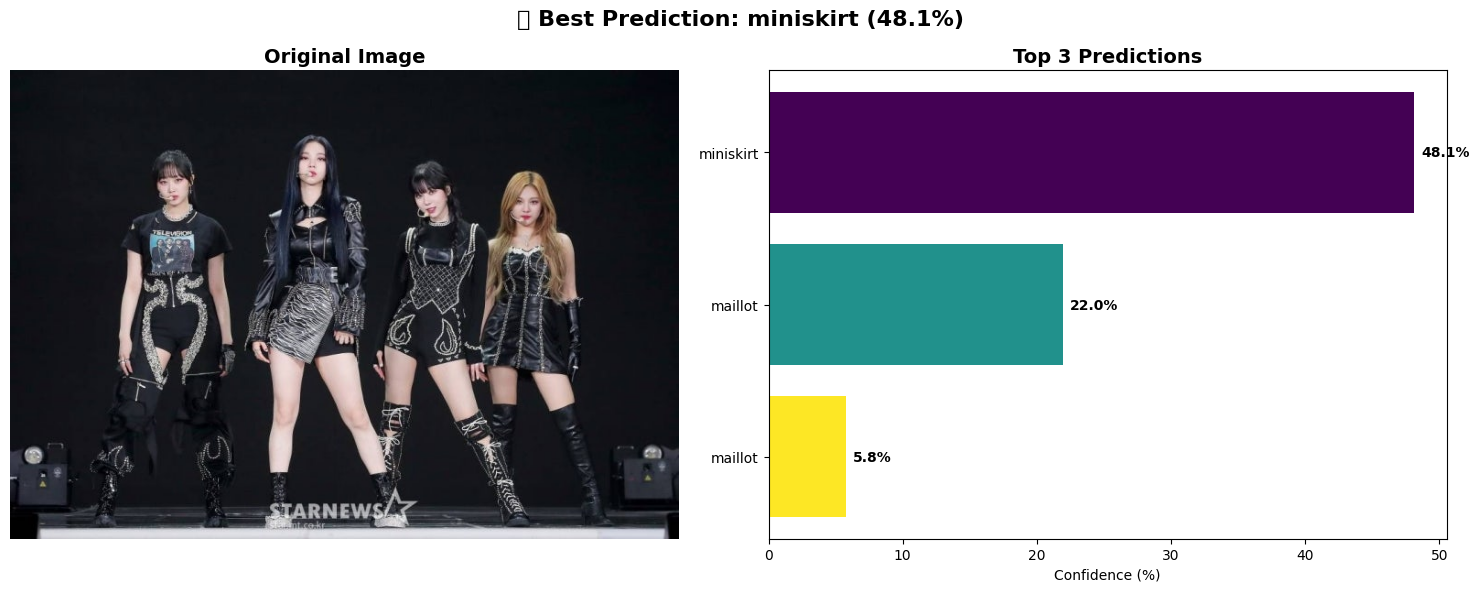


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[6/10] 📷 아이돌 사진2(밝은버전).jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. jean                           88.21%
2. military uniform               1.52%
3. coho                           1.11%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


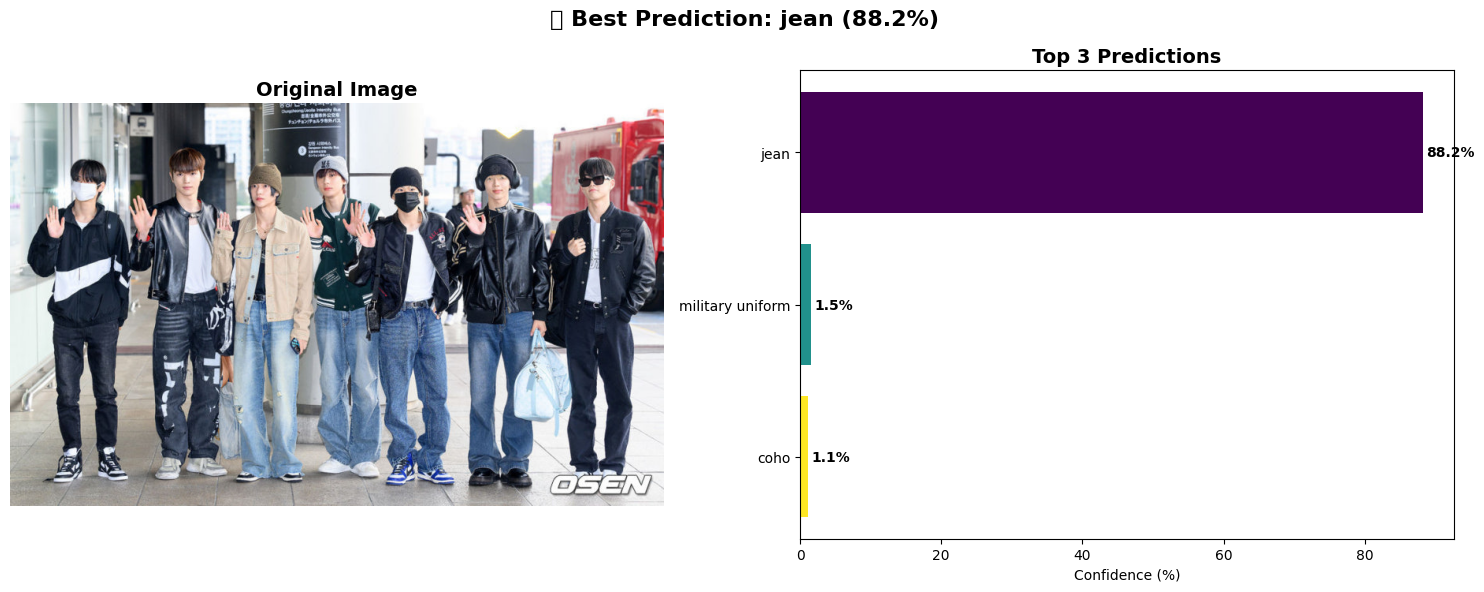


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[7/10] 📷 아이들 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. parallel bars                  6.24%
2. overskirt                      5.95%
3. candle                         5.06%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


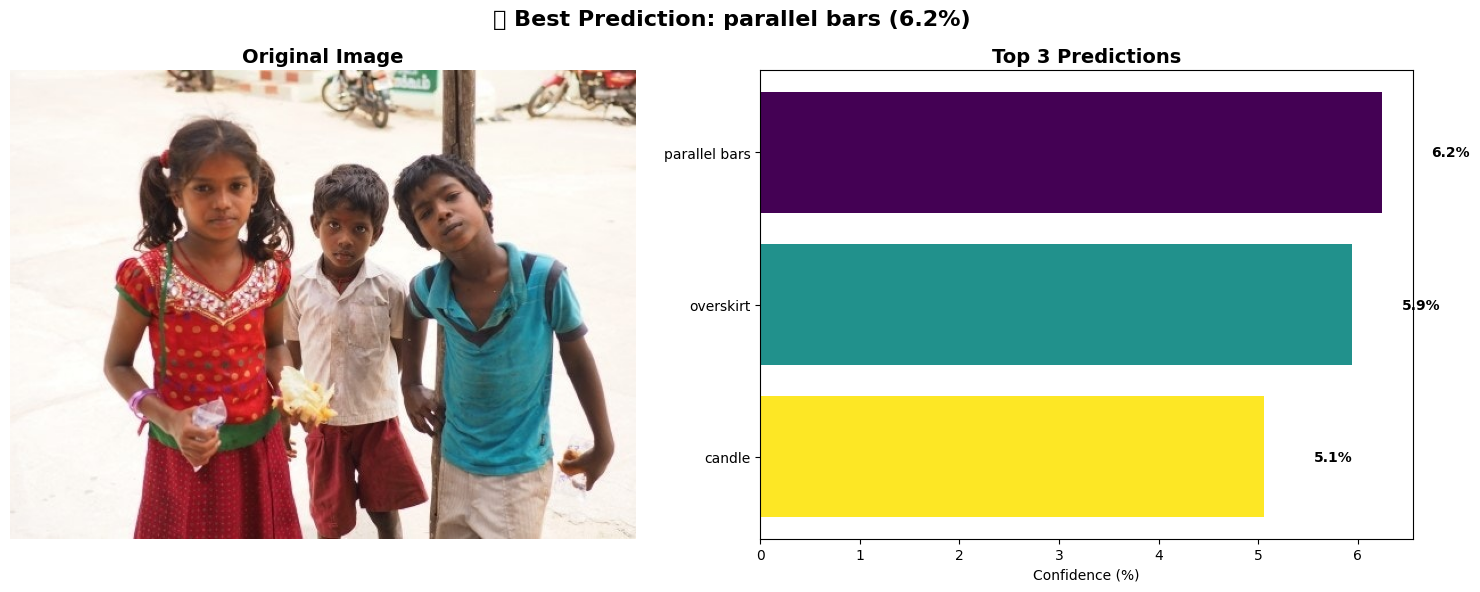


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[8/10] 📷 자동차 안 사람 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. cellular telephone             9.67%
2. seat belt                      7.50%
3. stretcher                      6.37%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


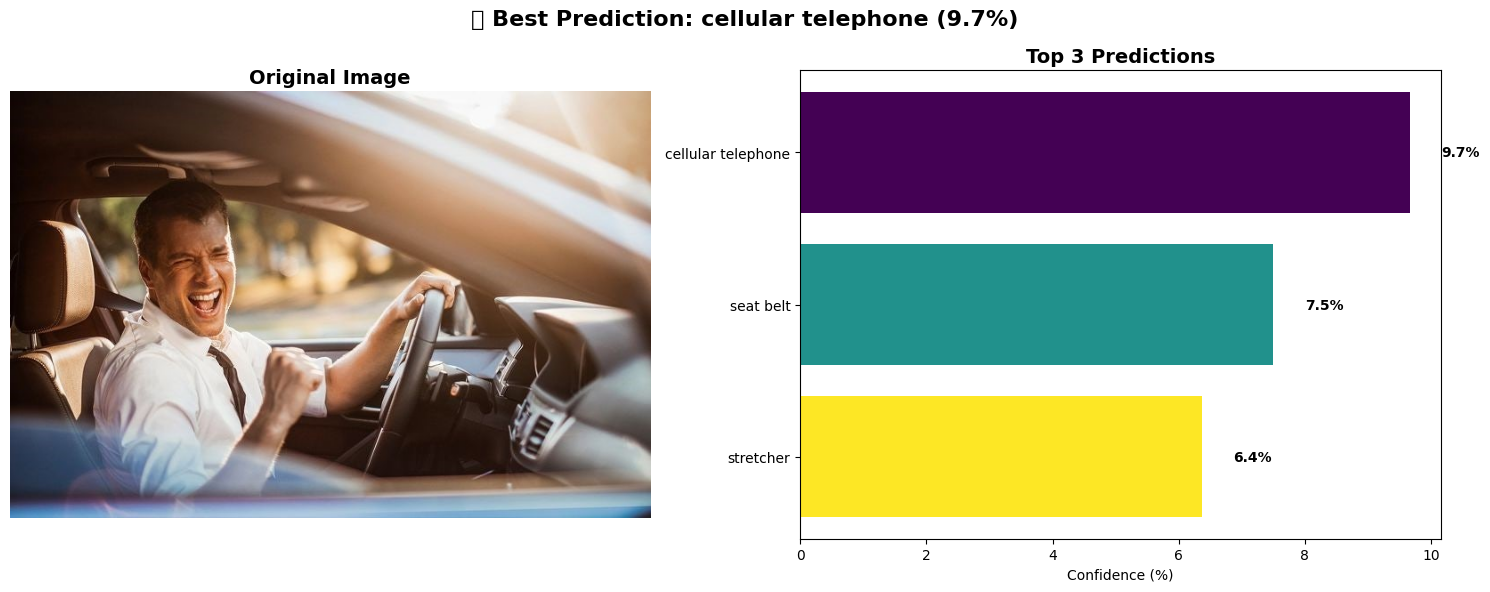


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[9/10] 📷 자전거 타는 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. mountain bike                  98.43%
2. moped                          0.40%
3. unicycle                       0.38%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


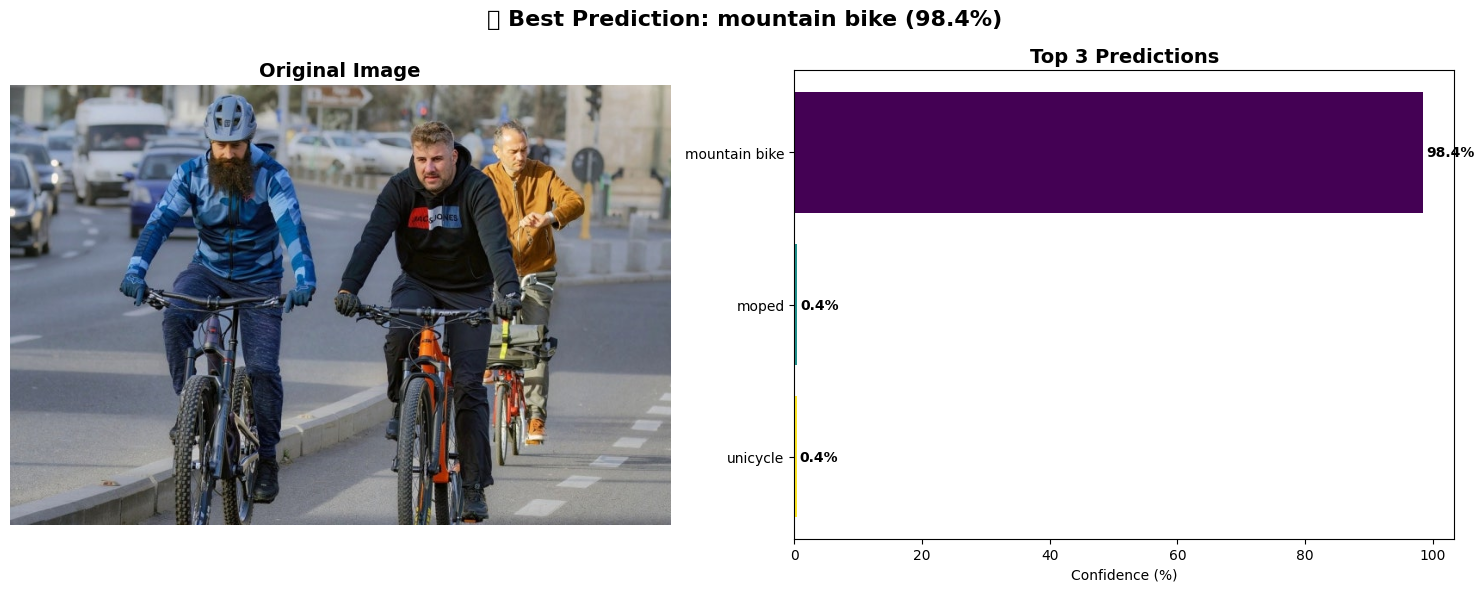


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

[10/10] 📷 학교 사진.jpg 분석 중...
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 3):
1. library                        96.94%
2. restaurant                     1.39%
3. desk                           0.80%


/tmp/ipython-input-1-2779276006.py:189: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


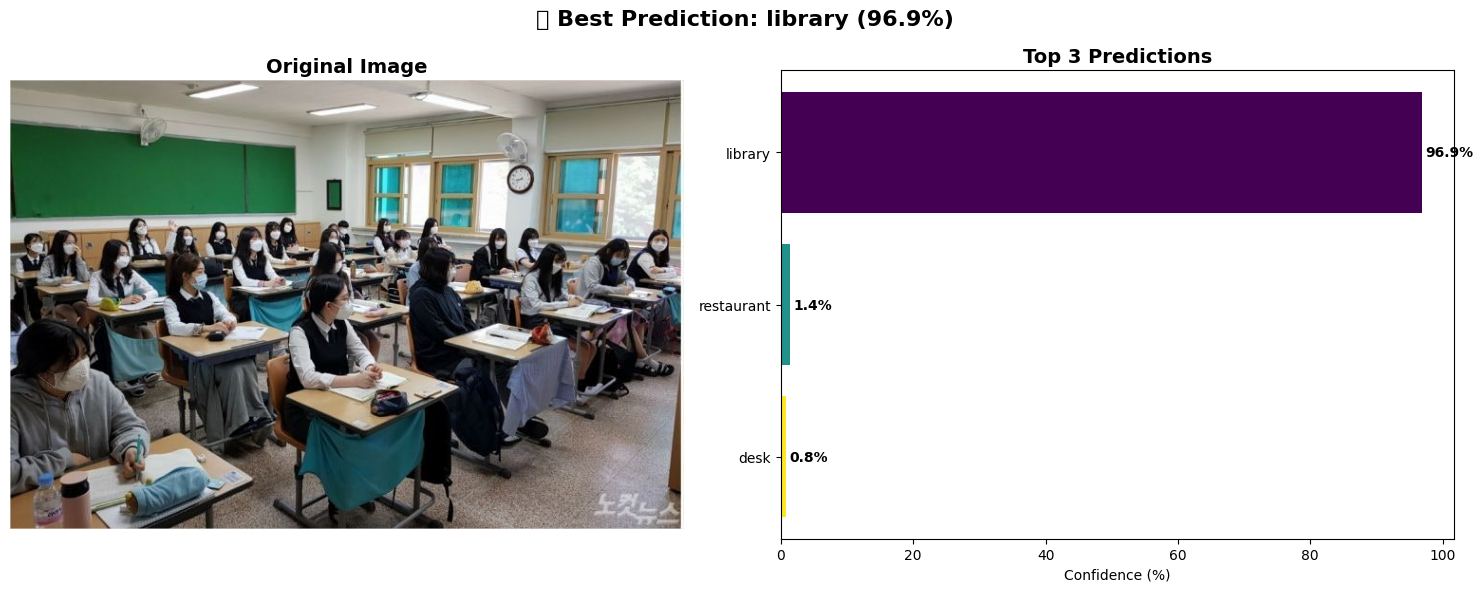


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

📊 전체 요약
농구사진.jpg                  → basketball           (99.8%)
신호등 건너는 사진.jpg            → traffic light        (12.2%)
신호등 건너는 사진2.jpg           → dumbbell             (35.9%)
신호등 건너는 사진3.jpg           → streetcar            (15.3%)
아이돌 사진.jpg                → miniskirt            (48.1%)
아이돌 사진2(밝은버전).jpg         → jean                 (88.2%)
아이들 사진.jpg                → parallel bars        (6.2%)
자동차 안 사람 사진.jpg           → cellular telephone   (9.7%)
자전거 타는 사진.jpg             → mountain bike        (98.4%)
학교 사진.jpg                 → library              (96.9%)

✅ 멀티 이미지 분류 완료!


[('농구사진.jpg', 'basketball', 99.80012774467468),
 ('신호등 건너는 사진.jpg', 'traffic light', 12.241056561470032),
 ('신호등 건너는 사진2.jpg', 'dumbbell', 35.89477241039276),
 ('신호등 건너는 사진3.jpg', 'streetcar', 15.253284573554993),
 ('아이돌 사진.jpg', 'miniskirt', 48.140349984169006),
 ('아이돌 사진2(밝은버전).jpg', 'jean', 88.21042776107788),
 ('아이들 사진.jpg', 'parallel bars', 6.23970553278923),
 ('자동차 안 사람 사진.jpg', 'cellular telephone', 9.669674187898636),
 ('자전거 타는 사진.jpg', 'mountain bike', 98.43007922172546),
 ('학교 사진.jpg', 'library', 96.94101810455322)]

In [1]:
# 📦 Google Colab용 ImageNet 1000개 클래스 분류기
# 🧠 사전 훈련된 딥러닝 모델로 즉시 객체 인식!

# 필요한 라이브러리 설치 및 임포트
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from io import BytesIO
import cv2

print("✅ 라이브러리 로드 완료!")
print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"💻 CUDA 사용 가능: {torch.cuda.is_available()}")

# =============================================================================
# ImageNet 1000개 클래스 분류기
# =============================================================================

class ImageNetClassifier:
    """ImageNet 사전 훈련된 모델을 사용한 1000개 클래스 분류기"""

    def __init__(self, model_name='resnet50'):
        # 생성자: 모델과 라벨, 전처리기를 초기화
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드 및 평가 모드 설정
        self.model = self.load_model(model_name)
        self.model.eval()  # 평가 모드

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels()

        # 이미지 전처리 파이프라인 정의
        self.transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")

    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        models_dict = {
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        if model_name not in models_dict:
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        model = models_dict[model_name]
        return model.to(self.device)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드"""
        try:
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
            response = requests.get(url)
            labels = response.text.strip().split('\n')
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels
        except:
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB')
                else:
                    image = Image.open(image_source).convert('RGB')
            else:
                image = image_source.convert('RGB')

            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패: {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리"""
        if image is None:
            return None
        tensor = self.transform(image).unsqueeze(0)  # 배치 차원 추가
        return tensor.to(self.device)

    def predict(self, image_source, top_k=5):
        """이미지 분류 예측"""
        print(f"🔍 이미지 분석 중...")

        image = self.load_image(image_source)
        if image is None:
            return None

        original_image = image.copy()
        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

        top_prob, top_indices = torch.topk(probabilities, top_k)

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return {
            'original_image': original_image,
            'predictions': results,
            'model_info': {
                'model_name': self.model.__class__.__name__,
                'device': str(self.device),
                'total_classes': len(self.class_labels)
            }
        }

    def visualize_results(self, results, show_top_k=5):
        """결과 시각화"""
        if results is None:
            print("❌ 결과가 없습니다.")
            return

        print(f"\n🎯 ImageNet 분류 결과 (Top {show_top_k}):")
        print("=" * 60)
        predictions = results['predictions'][:show_top_k]
        for pred in predictions:
            print(f"{pred['rank']}. {pred['class_name']:<30} {pred['percentage']:.2f}%")
        print("=" * 60)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        class_names = [pred['class_name'][:20] for pred in predictions]
        probabilities = [pred['percentage'] for pred in predictions]
        colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))

        bars = ax2.barh(range(len(predictions)), probabilities, color=colors)
        ax2.set_yticks(range(len(predictions)))
        ax2.set_yticklabels(class_names)
        ax2.set_xlabel('Confidence (%)')
        ax2.set_title(f'Top {show_top_k} Predictions', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()

        for i, (bar, prob) in enumerate(zip(bars, probabilities)):
            ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                     f'{prob:.1f}%', va='center', fontweight='bold')

        best_prediction = predictions[0]
        plt.suptitle(f'🏆 Best Prediction: {best_prediction["class_name"]} ({best_prediction["percentage"]:.1f}%)',
                     fontsize=16, fontweight='bold')

        plt.tight_layout()
        plt.show()

        model_info = results['model_info']
        print(f"\n📊 모델 정보:")
        print(f"   🧠 모델: {model_info['model_name']}")
        print(f"   💻 디바이스: {model_info['device']}")
        print(f"   📋 총 클래스 수: {model_info['total_classes']}")

    def compare_models(self, image_source, model_names=['resnet50', 'vgg16', 'efficientnet_b0']):
        """여러 모델 성능 비교"""
        print(f"🔄 다중 모델 비교 시작...")

        original_model = self.model
        original_name = original_model.__class__.__name__

        results_comparison = []

        for model_name in model_names:
            print(f"\n🧠 {model_name} 모델로 예측 중...")
            self.model = self.load_model(model_name)
            self.model.eval()
            result = self.predict(image_source, top_k=3)
            if result:
                best_pred = result['predictions'][0]
                results_comparison.append({
                    'model_name': model_name,
                    'best_class': best_pred['class_name'],
                    'confidence': best_pred['percentage'],
                    'top3': result['predictions']
                })

        self.model = original_model

        if results_comparison:
            self.visualize_model_comparison(results_comparison, image_source)

        return results_comparison

    def visualize_model_comparison(self, results_comparison, image_source):
        """모델 비교 결과 시각화"""
        image = self.load_image(image_source)

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')

        model_names = [result['model_name'] for result in results_comparison]
        confidences = [result['confidence'] for result in results_comparison]
        predictions = [result['best_class'][:15] for result in results_comparison]
        colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(model_names)]

        bars = axes[0, 1].bar(model_names, confidences, color=colors, alpha=0.7)
        axes[0, 1].set_title('Model Confidence Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Confidence (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        for bar, pred, conf in zip(bars, predictions, confidences):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                            f'{pred}\n{conf:.1f}%', ha='center', va='bottom', fontsize=10)

        axes[1, 0].axis('off')
        table_data = []
        for result in results_comparison:
            row = [result['model_name'], result['best_class'][:20], f"{result['confidence']:.1f}%"]
            table_data.append(row)

        table = axes[1, 0].table(cellText=table_data,
                                 colLabels=['Model', 'Best Prediction', 'Confidence'],
                                 cellLoc='center',
                                 loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 0].set_title('Detailed Comparison', fontsize=14, fontweight='bold')

        axes[1, 1].axis('off')
        y_pos = 0.9
        for result in results_comparison:
            axes[1, 1].text(0.05, y_pos, f"🧠 {result['model_name']}:", fontweight='bold', fontsize=12)
            y_pos -= 0.08
            for i, pred in enumerate(result['top3']):
                axes[1, 1].text(0.1, y_pos, f"{i+1}. {pred['class_name'][:25]} ({pred['percentage']:.1f}%)",
                                fontsize=10)
                y_pos -= 0.06
            y_pos -= 0.02

        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('Top 3 Predictions per Model', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

# =============================================================================
# 실행 함수들
# =============================================================================

def classify_uploaded_image(max_images: int = 10):  # 🔄 [MOD] 매개변수 추가
    """파일 업로드 후 최대 10개 이미지 ImageNet 분류"""  # 🔄 [MOD] 설명 수정
    print("🚀 ImageNet 1000개 클래스 분류기 시작!")
    print("=" * 60)
    print(f"📁 이미지를 최대 {max_images}장까지 업로드해 주세요...")  # 🔄 [MOD]
    print("🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!")

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    # 🔄 [MOD] 업로드 개수 제한
    filenames = list(uploaded.keys())[:max_images]
    if len(uploaded) > max_images:
        print(f"⚠️ {max_images}장까지만 분석합니다. 나머지는 건너뜁니다.")

    try:
        classifier = ImageNetClassifier(model_name='resnet50')
        results_summary = []

        # 🔄 [MOD] 여러 이미지 반복 처리
        for idx, filename in enumerate(filenames, 1):
            print(f"\n[{idx}/{len(filenames)}] 📷 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)
            if results:
                classifier.visualize_results(results, show_top_k=3)
                best = results['predictions'][0]
                results_summary.append((filename, best['class_name'], best['percentage']))

        # 🔄 [MOD] 전체 요약
        print("\n📊 전체 요약")
        for fname, cls, conf in results_summary:
            print(f"{fname:25} → {cls:20} ({conf:.1f}%)")

        print("\n✅ 멀티 이미지 분류 완료!")
        return results_summary

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def compare_multiple_models():
    """여러 모델로 동일 이미지 비교"""
    print("🔄 다중 모델 성능 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        classifier = ImageNetClassifier()
        models_to_compare = ['resnet50', 'vgg16', 'efficientnet_b0', 'mobilenet_v2']
        comparison_results = classifier.compare_models(filename, models_to_compare)

        print("\n✅ 다중 모델 비교 완료!")
        return comparison_results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def batch_classify():
    """여러 이미지 일괄 업로드 분류 (원본 그대로)"""
    print("📁 여러 이미지 일괄 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    try:
        classifier = ImageNetClassifier()
        results_list = []

        for filename in uploaded.keys():
            print(f"\n🔍 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)

            if results:
                best_pred = results['predictions'][0]
                print(f"🏆 {filename}: {best_pred['class_name']} ({best_pred['percentage']:.1f}%)")
                results_list.append((filename, best_pred['class_name'], best_pred['percentage']))

        print(f"\n{'='*60}")
        print("📋 일괄 분류 결과 요약")
        print(f"{'='*60}")
        for filename, pred_class, confidence in results_list:
            print(f"📷 {filename:25} → {pred_class:20} ({confidence:.1f}%)")

        return results_list

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 ImageNet 1000개 클래스 분류기 실행 옵션:")
print("1. 다중 이미지 분류(≤10장): classify_uploaded_image()")   # 🔄 [MOD] 설명 갱신
print("2. 다중 모델 비교: compare_multiple_models()")
print("3. 여러 이미지 일괄 분류: batch_classify()")
print("\n💡 추천: classify_uploaded_image() 로 여러 이미지 테스트해 보세요!")
print("\n🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("\n⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!")

# 사용자가 직접 함수 호출
classify_uploaded_image()  # 🔄 [MOD] 기본 실행도 다중 이미지 지원
